# 6.4 Machine Learning Part 1

### Contents

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. Data prep for regression analysis

#### 4. Regression analysis

    Life expectancy vs Adult mortality.
    Life expectancy vs HIV/AIDS.

### 1. Importing libraries and data

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [83]:
# Define the path

path = r'C:\Users\Jimadek\Answer 6.4-Jaabir'

In [84]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data','Original Data','Life_Expectancy_Clean.csv'), index_col=False)

### 2. Data cleaning

In [85]:
df.head()

Unnamed: 0      Country  Year      Status  Life expectancy  \
0           0  Afghanistan  2015  Developing             65.0   
1           1  Afghanistan  2014  Developing             59.9   
2           2  Afghanistan  2013  Developing             59.9   
3           3  Afghanistan  2012  Developing             59.5   
4           4  Afghanistan  2011  Developing             59.2   

   Adult mortality  Infant deaths  Alcohol  Percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  ...  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0         65.0  ...               8.16        65.0       0.1  584.259210   
1         62.0  ...               8.18        62.0       0.1  612.696514   
2         64.0  ...               8.13        64.0       0.1  631.744976   
3         67.0  ...               8.52        67.0       0.1  669.959000   
4         68.0  ...               7.87        68.0       0.1   63.537231   

   Population  Thinness 1-19 years  Thinness 5-9 years  \
0  33736494.0                 17.2                17.3   
1    327582.0                 17.5                17.5   
2  31731688.0                 17.7                17.7   
3   3696958.0                 17.9                18.0   
4   2978599.0                 18.2                18.2   

   Income composition of resources  Schooling  Continent  
0                            0.479       10.1       Asia  
1                            0.476       10.0       Asia  
2                            0.470        9.9       Asia  
3                            0.463        9.8       Asia  
4                            0.454        9.5       Asia  

[5 rows x 24 columns]

In [86]:
df.shape

(2938, 24)

##### Missing values

In [87]:
# Check for missing values

df.isnull().sum()


# No missing values to handle

Unnamed: 0                         0
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Continent                          0
dtype: int64

##### Duplicate values

In [88]:
# Check for duplicate values

dups = df.duplicated()

In [89]:
dups.shape

# No duplucates to handle

(2938,)

##### Extreme values check

C:\Users\Jimadek\AppData\Local\Temp\ipykernel_27568\3458943308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life expectancy'],bins = 25, kde = True)


<Axes: xlabel='Life expectancy', ylabel='Density'>

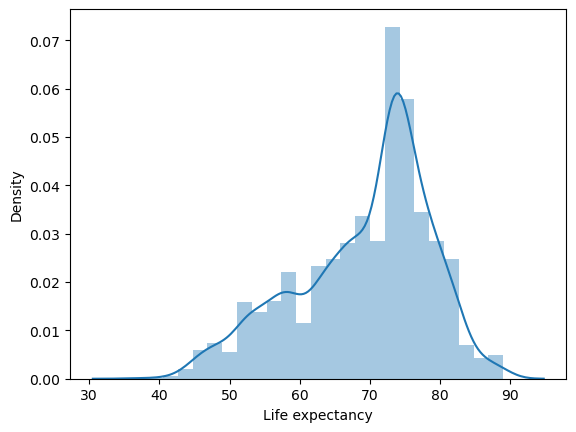

In [90]:
# Check for extremeLife expectancy values
sns.distplot(df['Life expectancy'],bins = 25, kde = True)

In [91]:
df['Life expectancy'].mean() # Check the mean

69.23471749489448

In [92]:
df['Life expectancy'].median() # Check the median

72.1

In [93]:
df['Life expectancy'].max() # Check the max

89.0

In [94]:
df['Life expectancy'].min() # Check min

36.3

In [95]:
df.describe()

Unnamed: 0         Year  Life expectancy  Adult mortality  \
count  2938.000000  2938.000000      2938.000000      2938.000000   
mean   1468.500000  2007.518720        69.234717       164.725664   
std     848.271871     4.613841         9.509115       124.086215   
min       0.000000  2000.000000        36.300000         1.000000   
25%     734.250000  2004.000000        63.200000        74.000000   
50%    1468.500000  2008.000000        72.100000       144.000000   
75%    2202.750000  2012.000000        75.600000       227.000000   
max    2937.000000  2015.000000        89.000000       723.000000   

       Infant deaths      Alcohol  Percentage expenditure  Hepatitis B  \
count    2938.000000  2938.000000             2938.000000  2938.000000   
mean       30.303948     4.546875              738.251295    80.940461   
std       117.926501     3.921946             1987.914858    22.586855   
min         0.000000     0.010000                0.000000     1.000000   
25%         0.000000     1.092500                4.685343    80.940461   
50%         3.000000     3.755000               64.912906    87.000000   
75%        22.000000     7.390000              441.534144    96.000000   
max      1800.000000    17.870000            19479.911610    99.000000   

            Measles           BMI  ...        Polio  Total expenditure  \
count    2938.000000  2938.000000  ...  2938.000000        2938.000000   
mean     2419.592240    38.321247  ...    82.550188           5.938190   
std     11467.272489    19.927677  ...    23.352143           2.400274   
min         0.000000     1.000000  ...     3.000000           0.370000   
25%         0.000000    19.400000  ...    78.000000           4.370000   
50%        17.000000    43.000000  ...    93.000000           5.938190   
75%       360.250000    56.100000  ...    97.000000           7.330000   
max    212183.000000    87.300000  ...    99.000000          17.600000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.324084     1.742103    7432.624083  1.323263e+07   
std      23.640073     5.077785   13307.230567  5.402643e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    2327.392900  3.326705e+06   
75%      97.000000     0.800000    7375.560046  9.860278e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       Thinness 1-19 years  Thinness 5-9 years  \
count          2938.000000         2938.000000   
mean              4.839704            4.870317   
std               4.394535            4.482708   
min               0.100000            0.100000   
25%               1.600000            1.600000   
50%               3.400000            3.400000   
75%               7.100000            7.200000   
max              27.700000           28.600000   

       Income composition of resources     Schooling  
count                     2.938000e+03  2.938000e+03  
mean                      6.619026e+05  6.576790e+05  
std                       3.278238e+06  3.275073e+06  
min                       0.000000e+00  0.000000e+00  
25%                       5.042500e-01  1.030000e+01  
50%                       6.895000e-01  1.250000e+01  
75%                       7.970000e-01  1.470000e+01  
max                       2.742576e+07  2.742576e+07  

[8 rows x 21 columns]

### 3. Data prep for regression analysis

#### Hypothesis 1: If adult mortality is high, life expectancy will be short.

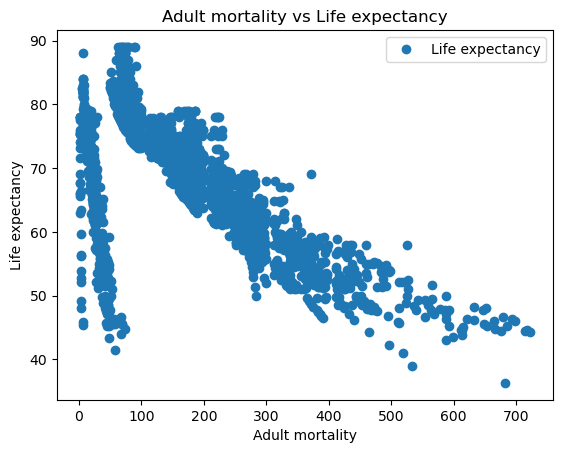

In [96]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Adult mortality', y='Life expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Adult mortality vs Life expectancy')  
plt.xlabel('Adult mortality')  
plt.ylabel('Life expectancy')  
plt.show()

In [97]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Adult mortality'].values.reshape(-1,1)
y = df['Life expectancy'].values.reshape(-1,1)

In [98]:
X

array([[263.],
       [271.],
       [268.],
       ...,
       [ 73.],
       [686.],
       [665.]])

In [99]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [100]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [101]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [102]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [103]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

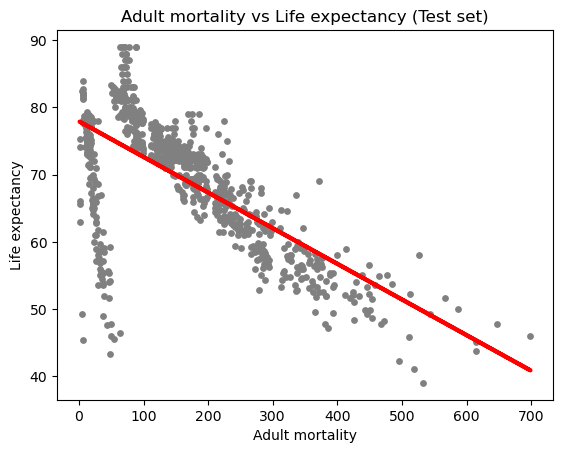

In [104]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Adult mortality vs Life expectancy (Test set)')
plot_test.xlabel('Adult mortality')
plot_test.ylabel('Life expectancy')
plot_test.show()

####  The linear model represented by the red regression line doesn’t perfectly cover all of your data points. For instance, where the adult mortality is low (< 100), there are still many data points that indicate low adult mortality, which contradicts the hypothesis.

In [105]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [106]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05303197]]
Mean squared error:  46.916569553998045
R2 score:  0.47435715060719585


In [107]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     77.3  71.467415
1     66.6  67.383953
2     52.6  55.451761
3     61.5  75.922100
4     60.0  59.959478
5     69.3  68.603689
6     71.1  69.134008
7     81.5  73.535661
8     74.3  69.770392
9     51.9  54.921442
10    65.5  76.770611
11    87.0  74.012949
12    76.9  71.838639
13    76.1  73.111406
14    65.0  64.467195
15    74.6  71.149223
16    59.3  59.535223
17    64.2  62.770172
18    73.0  69.080976
19    81.4  74.331141
20    71.8  71.361351
21    65.9  76.558484
22    73.6  77.194867
23    79.9  74.172045
24    71.7  69.293104
25    62.0  64.095972
26    81.5  74.384173
27    74.0  67.914273
28    72.4  71.361351
29    73.1  77.247899

#### The summary statistics of the model and the variance between the actual vs prdicted values confirm that the model is inaccurate.  A R2 score of 0.4743 indicates a relatively poor fit but the small MSE of 46.916 is not too bad but not good enough. The negative slope indicates that as adult mortality increases as life expectancy drops at a degree of 0.0530.

##### Compare how the regression fits the training set

In [108]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [109]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [110]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05303197]]
Mean squared error:  46.40510437187581
R2 score:  0.48919422107275823


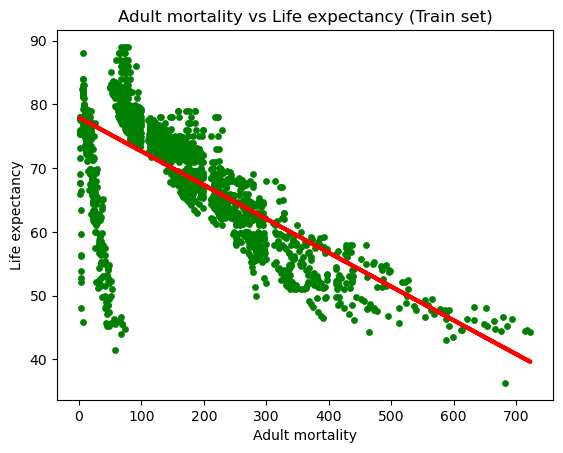

In [111]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Adult mortality vs Life expectancy (Train set)')
plot_test.xlabel('Adult mortality')
plot_test.ylabel('Life expectancy')
plot_test.show()

#### The models outcome on the training set is very similar to that on the test set.  With almost the same slope  -0.0530, R2 0.4891, and MSE 46.4051 on the train set, this confirms that the relationship between adult mortality and life expectancy is not linear.

#### Hypothesis 1b: If HIV/AIDS rate is high, life expectancy will be short.

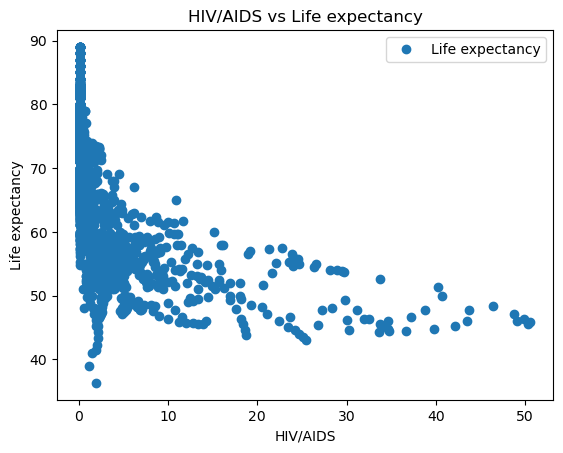

In [112]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'HIV/AIDS', y='Life expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('HIV/AIDS vs Life expectancy')  
plt.xlabel('HIV/AIDS')  
plt.ylabel('Life expectancy')  
plt.show()

In [113]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['HIV/AIDS'].values.reshape(-1,1)
y = df['Life expectancy'].values.reshape(-1,1)

In [114]:
X

array([[ 0.1],
       [ 0.1],
       [ 0.1],
       ...,
       [39.8],
       [42.1],
       [43.5]])

In [115]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [116]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [117]:
### 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [118]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [119]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

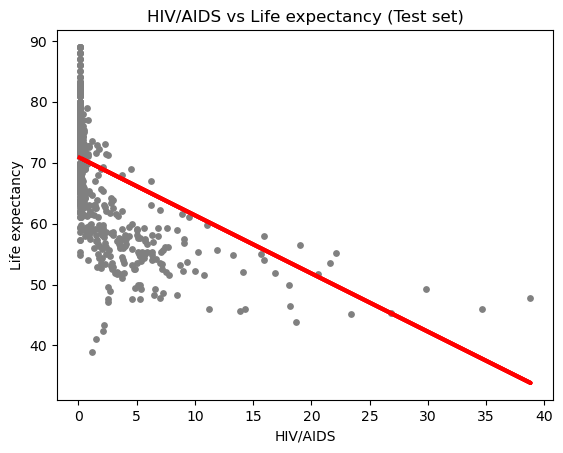

In [120]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('HIV/AIDS vs Life expectancy (Test set)')
plot_test.xlabel('HIV/AIDS')
plot_test.ylabel('Life expectancy')
plot_test.show()

In [121]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [122]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.95561981]]
Mean squared error:  62.694984029419494
R2 score:  0.2975792910449032


In [123]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     77.3  70.828162
1     66.6  70.637038
2     52.6  64.043261
3     61.5  67.865740
4     60.0  66.527873
5     69.3  70.828162
6     71.1  70.828162
7     81.5  70.828162
8     74.3  70.828162
9     51.9  54.773749
10    65.5  70.637038
11    87.0  70.828162
12    76.9  70.828162
13    76.1  70.828162
14    65.0  70.637038
15    74.6  70.828162
16    59.3  64.425509
17    64.2  68.247988
18    73.0  68.725798
19    81.4  70.828162
20    71.8  70.828162
21    65.9  70.828162
22    73.6  70.828162
23    79.9  70.828162
24    71.7  70.828162
25    62.0  70.828162
26    81.5  70.828162
27    74.0  70.828162
28    72.4  70.541476
29    73.1  70.828162

#### The summary statistics of the model and the variance between the actual vs predicted values confirm that the model is inaccurate.  A R2 score of 0.2975 indicates a relatively poor fit just as the large MSE of 62.6949 shows the regression line is far away from the data points. The negative slope indicates that as an increase in HIV/AIDS cases causes decrease in the life expectancy at a degree of 0.9556.

#### Compare how the regression fits the training set

In [124]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [125]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [126]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.95561981]]
Mean squared error:  62.52132245348056
R2 score:  0.31179439745497883


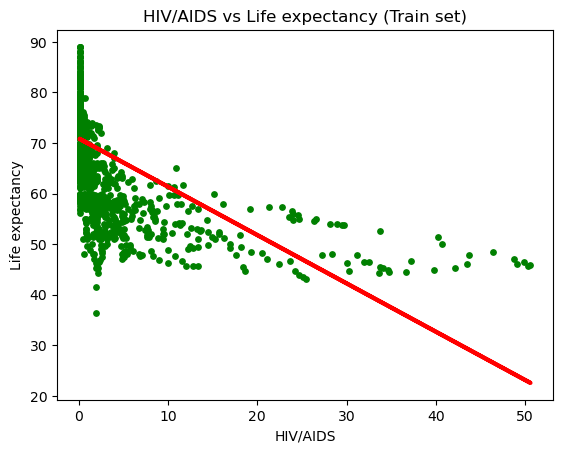

In [127]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('HIV/AIDS vs Life expectancy (Train set)')
plot_test.xlabel('HIV/AIDS')
plot_test.ylabel('Life expectancy')
plot_test.show()

#### The models outcome on the training set is similar to that on the test set.  With a less steeper slope  -0.9556, a bigger R2 0.3117, and a larger MSE 62.5213 on the train set, this confirms that the relationship between HIV/AIDS and life expectancy is not linear.